In [2]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
%matplotlib inline 

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [3]:
csv = '/home/shikha/Documents/PS1/COVID-19/notebooks/clean_df.csv'
df = pd.read_csv(csv)
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,Sample No.,Patient ID,Study ID,Age,Gender,BMI,Symptoms Presented,Symptoms Present?,Fever,Cough,...,ALKALINE PHOSPHATASE,C-REACTIVE PROTEINS,ECG,CXR,CORADS SCORE ON HRCT,PATIENT CATEGORY,PLASMA THERAPY,Age Above 60?,Temp Groups,CORADS 6
0,1013,IGIB1040201013,IGIB1040201013-1,0.551724,1,0.436782,"fever, cough,breathlessness",1,1,1,...,0.127089,0.152271,sinus rhythm,normal,4.0,5a,No,0,0.2,0.0
1,1014,IGIB1040201014,IGIB1040201014-1,0.241379,0,0.804598,asymptomatic,0,0,0,...,0.172501,0.009346,sinus rhythm,normal,0.0,5b,No,0,0.6,0.0
2,1015,IGIB1040201015,IGIB1040201015-1,0.264368,1,0.402299,asymptomatic,0,0,0,...,0.259224,0.026437,sinus rhythm,normal,0.0,5b,No,0,0.4,0.0
3,1016,IGIB1040201016,IGIB1040201016-1,0.781609,1,0.321839,"fever, cough,breathlessness",1,1,1,...,0.366446,0.443161,sinus rhythm,normal,5.0,4,No,1,0.4,0.0
4,1060,IGIB1040201060,IGIB1040201060-1,0.505747,1,1.000000,"fever,cough",1,1,1,...,0.546200,0.430297,sinus rhythm,normal,5.0,4,No,0,0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,950,IGIB104020950,IGIB104020950-1,0.551724,1,0.977011,"fever, cough,breathlessness",1,1,1,...,0.219174,0.334734,sinus rhythm,normal,5.0,4,No,0,0.6,0.0
171,965,IGIB104020965,IGIB104020965-1,0.321839,1,0.839080,"fever, cough,breathlessness",1,1,1,...,0.169032,0.362431,sinus tachycardia,normal,5.0,4,No,0,0.6,0.0
172,9667,IGIB1040209667,IGIB1040209667-1,0.747126,1,0.310345,"fever, breathlessness",1,1,0,...,0.177547,0.375164,sinus rhythm,normal,5.0,4,No,1,0.4,0.0
173,9759,IGIB1040209759,IGIB1040209759-1,0.689655,0,0.425287,breathlessness and cough,1,0,1,...,0.669190,0.325282,sinus rhythm,normal,6.0,4,No,1,0.6,1.0


In [24]:
def visualize(x,y, model):
    
        cm = metrics.confusion_matrix(y, model.predict(x))
        plt.figure
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        plt.savefig('covidseverity.png')
        
        
def ttmodel(X, Y, lm, n):
    
        train_accuracy = [0]*n
        train_precision = [0]*n
        train_recall = [0]*n
        train_f1 = [0]*n

        test_accuracy = [0]*n
        test_precision = [0]*n
        test_recall = [0]*n
        test_f1 = [0]*n
        
        for i in range(n):
            x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

            lm.fit(x_train,y_train)

            train_accuracy[i] = lm.score(x_train,y_train)
            train_precision[i], train_recall[i], train_f1[i], s = sklearn.metrics.precision_recall_fscore_support(y_train, lm.predict(x_train), average='binary')

            test_accuracy[i] = lm.score(x_test,y_test)
            test_precision[i], test_recall[i], test_f1[i], s = sklearn.metrics.precision_recall_fscore_support(y_test, lm.predict(x_test), average='binary')

        print("Average training statistics over",n,"runs of the neural network model - ")
        print("Accuracy Score = ", sum(train_accuracy)/n)
        print("Precision Score = ", sum(train_precision)/n)    
        print("Recall Score = ", sum(train_recall)/n)   
        print("F1 Score = ", sum(train_f1)/n) 

        print()
        
        print("Average testing statistics over",n,"runs of the neural network model - ")
        print("Accuracy Score = ", sum(test_accuracy)/n)
        print("Precision Score = ", sum(test_precision)/n)    
        print("Recall Score = ", sum(test_recall)/n)   
        print("F1 Score = ", sum(test_f1)/n) 
        
        visualize(x_test, y_test, lm)
        
        
def cvmodel(X, Y, lm, cv):
    
        from sklearn.model_selection import cross_validate
        scoring = ['f1','roc_auc']
        scores = cross_validate(lm, X, Y, cv=cv, scoring = scoring, return_train_score=True)
        
        for k,v in scores.items():
            ans = [min(v),sum(v)/len(v),max(v)]
            print(k,"=",ans)
            print()


In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

Average training statistics over 100 runs of the neural network model - 
Accuracy Score =  0.9792366412213747
Precision Score =  0.9059132635655626
Recall Score =  0.969375362425672
F1 Score =  0.9300896896468955

Average testing statistics over 100 runs of the neural network model - 
Accuracy Score =  0.8672727272727273
Precision Score =  0.5378588217338216
Recall Score =  0.6254468864468862
F1 Score =  0.5550147899131271


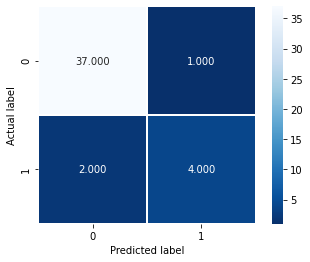

In [26]:
nn = MLPClassifier(solver='lbfgs', activation='logistic',hidden_layer_sizes=(5, 2), max_iter=5000)

#Maybe - Temp, SPO2, TOTAL PROTEINS, SODIUM
X = df[['Age Above 60?','Gender','Temp Groups','Respiratory rate(breaths per minute)','Symptoms Present?','Co-morbidity?','Cough','Breathlessness','Hypertension','C-REACTIVE PROTEINS','UREA']]
Y = df['Outcome']

ttmodel(X, Y, nn, 100)

In [27]:
cvmodel(X,Y,nn,7)

fit_time = [0.028814077377319336, 0.42092510632106234, 2.034738063812256]

score_time = [0.004631996154785156, 0.005348682403564453, 0.006509065628051758]

test_f1 = [0.28571428571428575, 0.5350030921459494, 0.7272727272727273]

train_f1 = [0.7272727272727273, 0.9048089230813483, 1.0]

test_roc_auc = [0.6666666666666667, 0.8283858998144712, 0.9761904761904762]

train_roc_auc = [0.9351923076923077, 0.9767585967004572, 1.0]

